In [4]:

import os
os.chdir('/home/BCCRC.CA/ssubedi/projects/experiments/asapp')
from asap.util.io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
from asap.util import topics

import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc
from sklearn.preprocessing import StandardScaler


from asap.data.dataloader import DataSet
from scipy.linalg import qr

experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sample_in = args.home + args.experiment + args.input+ args.sample_id +'/'+args.sample_id
sample_out = args.home + args.experiment + args.output+ args.sample_id +'/'+args.sample_id


dl = DataSet('pbmc',sample_in,sample_out)
dl.initialize_data()
dl.add_batch_label([i.split('_')[1] for i in dl.barcodes])
dl.load_data()

print(dl.inpath)
print(dl.outpath)


X_rows = dl.mtx.shape[0]
tree_max_depth = 10

rp_mat = []
for _ in range(tree_max_depth):
    rp_mat.append(np.random.normal(size = (X_rows,1)).flatten())                      
rp_mat = np.asarray(rp_mat)

Z = np.dot(rp_mat,dl.mtx).T



/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/pbmc/pbmc
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/pbmc/pbmc


In [5]:
    b_mat = []
    for b in list(set(dl.batch_label)):
          b_mat.append([ 1 if x == b else 0 for x in dl.batch_label])
    b_mat = np.array(b_mat).T
    
    # u_batch, _, _ = np.linalg.svd(b_mat,full_matrices=False)
    # Zres = Z - u_batch@u_batch.T@Z
    # Q, _ ,_ = np.linalg.svd(Zres, full_matrices=False)

    # df = pd.DataFrame(Q,dtype=int)
    # df['code'] = df.astype(str).agg(''.join, axis=1)
    # df = df.reset_index()
    # df = df[['index','code']]
    # return df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']


In [7]:
u_batch, _, _ = np.linalg.svd(b_mat,full_matrices=False)
Zres = Z - u_batch@u_batch.T@Z
Q, _ ,_ = np.linalg.svd(Zres, full_matrices=False)

In [13]:
Q = (np.sign(Q) + 1)/2
df = pd.DataFrame(Q,dtype=int)
df['code'] = df.astype(str).agg(''.join, axis=1)
df = df.reset_index()
df = df[['index','code']]
df2= df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']

In [14]:
df.code.value_counts()

1000111010    38
1000111100    33
1011111001    31
1000111110    31
0101001111    30
              ..
1111100110     1
1101101101     1
0010101100     1
1111001011     1
0100000101     1
Name: code, Length: 962, dtype: int64

(array([188.,  53.,  52.,  19.,  22.,  41.,  27.,  33.,  40.,  84.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

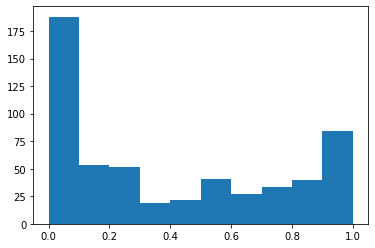

In [75]:
Q, s, _ = np.linalg.svd(Z, full_matrices=False)
Qt = (np.sign(Q) + 1)/2

df = pd.DataFrame(Qt,dtype=int)
df['code'] = df.astype(str).agg(''.join, axis=1)
df = df.reset_index()
df = df[['index','code']]
pbulkd = df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']
mix_res = []
for k in pbulkd.keys():
    mix = np.array(b)[pbulkd[k]]
    mix_res.append(len(mix[mix=='3k'])/len(mix))
plt.hist(mix_res)

In [76]:
b = [ x.split('_')[1] for x in dl.barcodes]
b3 = [ 1 if x =='3k' else 0 for x in b]
b4 = [ 1 if x =='4k' else 0 for x in b]
batch = np.array([b3,b4]).T


(array([257.,  75., 115.,  83.,  57., 152.,  56.,  43.,  66.,  76.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

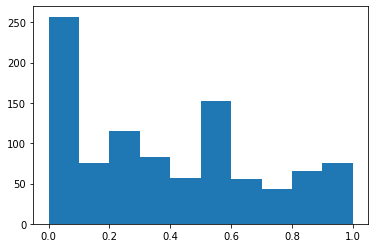

In [103]:
batch = StandardScaler().fit_transform(batch)
u_batch, s, _ = np.linalg.svd(batch,full_matrices=False)
Zres = Z - u_batch@u_batch.T@Z
Zres = StandardScaler().fit_transform(Zres)
Q, _ ,_ = np.linalg.svd(Zres, full_matrices=False)

Qt_res = (np.sign(Q) + 1)/2

df = pd.DataFrame(Qt_res,dtype=int)
df['code'] = df.astype(str).agg(''.join, axis=1)
df = df.reset_index()
df = df[['index','code']]
df
pbulkd = df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']
mix_res = []
for k in pbulkd.keys():
    mix = np.array(b)[pbulkd[k]]
    mix_res.append(len(mix[mix=='3k'])/len(mix))
plt.hist(mix_res)

(array([ 24.,  14.,  37.,  33.,  49.,  83.,  66.,  55.,  65., 138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

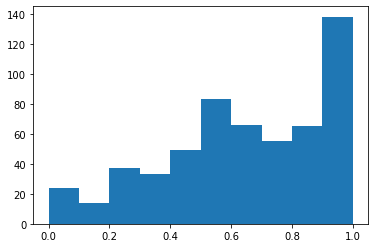

In [108]:
u_batch, s, _ = np.linalg.svd(batch,full_matrices=False)
Zres = Z - u_batch@u_batch.T@Z
Q, _ ,_ = np.linalg.svd(Zres, full_matrices=False)

Qt_res = (np.sign(Q) + 1)/2

df = pd.DataFrame(Qt_res,dtype=int)
df['code'] = df.astype(str).agg(''.join, axis=1)
df = df.reset_index()
df = df[['index','code']]
df
pbulkd = df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']
mix_res = []
for k in pbulkd.keys():
    mix = np.array(b)[pbulkd[k]]
    mix_res.append(len(mix[mix=='4k'])/len(mix))
plt.hist(mix_res)

In [111]:
df

,index,code
0,0,0000101010
1,1,1000100100
2,2,1011110011
3,3,1110011101
4,4,1100111110
...,...,...
7035,7035,1110011111
7036,7036,1011011011
7037,7037,1011010110
7038,7038,1010010101


In [114]:
mix = np.array(b)[pbulkd['1100111110']]
mix

array(['3k', '4k', '4k'], dtype='<U2')

In [ ]:
from sklearn.decomposition import PCA

	
# data scaling
x_scaled = StandardScaler().fit_transform(dl.mtx.T)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

In [ ]:
df_pca['batch'] = [x.split('_')[1] for x in dl.barcodes]
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_pca['batch'].unique()))
p = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='batch',s=5,palette=cp,legend=True)

In [ ]:
dft = pd.DataFrame(Q[:,:2],columns=['PC1','PC2'])
dft['batch'] = [x.split('_')[1] for x in dl.barcodes]
p = sns.scatterplot(data=dft, x='PC1', y='PC2', hue='batch',s=5,palette=cp,legend=True)

In [ ]:
dl.mtx.shape

In [ ]:
### run pca here -->



Q = (np.sign(Q) + 1)/2

df = pd.DataFrame(Q,dtype=int)
df['code'] = df.astype(str).agg(''.join, axis=1)
df = df.reset_index()
df = df[['index','code']]
pbulkd = df.groupby('code').agg(lambda x: list(x)).reset_index().set_index('code').to_dict()['index']

pbulk = {}
for key, value in pbulkd.items():
    pbulk[key] = mtx[:,value].sum(1)

pd.DataFrame.from_dict(pbulk,orient='index')


from asap.annotation import ASAPNMF
asap = ASAPNMF(adata=dl)
asap.get_pbulk()

In [ ]:
nz_cutoff = 10
dfall = dfall[dfall.iloc[:,2:].sum(1)>nz_cutoff].reset_index(drop=True)
genes = dfall['gene'].values
glens = dfall['length'].values
dfall = dfall.drop(columns=['gene','length'])


qt = QuantileTransformer(random_state=0)
dfall_q = qt.fit_transform(dfall)

mu_total = np.mean(dfall_q,axis=1)
 
scaler = StandardScaler()
dfall_q = pd.DataFrame(scaler.fit_transform(dfall_q.T).T,columns=dfall.columns)


u,d,v = skrsvd(dfall_q.to_numpy()/np.sqrt(dfall_q.shape[1]),n_components=50,random_state=0)
L_total = u * d

In [ ]:
def get_sc(L_total,mu_total,dfct,L_ct,mu_ct,pve_ct):
    z_total = np.dot(L_total,np.random.normal(size=L_total.shape[1])) + mu_total
    z_ct = np.dot(L_ct,np.random.normal(size=L_ct.shape[1])) + mu_ct
    x_sample = np.sort(dfct.apply(lambda x: np.random.choice(x), axis=1))
    z_sample = np.array([np.nan] * len(x_sample))
    z = z_ct * np.sqrt(pve_ct) + z_total * np.sqrt(1 - pve_ct)
    z_sample[np.argsort(z)] = x_sample
    return z_sample


In [ ]:
ct_prop = {'NK':7.4,
 'THSTAR':2.1,
 'TH1':1.5,
 'B_CELL_NAIVE':5.2,
 'TREG_MEM':1.2,
 'TH2':1.9,
 'TREG_NAIVE':0.4,
 'MONOCYTES':17.7,
 'M2':1.6,
 'TFH':2.7,
 'CD8_NAIVE':6.4,
 'CD4_NAIVE':11,
 'TH17':3.2
}

In [ ]:
size= 2
pve_ct = 0.99
all_indx = []
dfsc = pd.DataFrame()
for ct in cts:
    dfct = dfall[[x for x in dfall.columns if ct in x]]
    dfct_q = dfall_q[[x for x in dfall_q.columns if ct in x]]

    mu_ct = dfct_q.mean(1)

    scaler = StandardScaler()
    dfct_q = pd.DataFrame(scaler.fit_transform(dfct_q.T).T)

    u,d,v = rsvd(dfct_q.to_numpy()/np.sqrt(dfct_q.shape[1]),n_components=50,random_state=0)
    L_ct = u * d

    ct_sc = []
    for i in range(size):
        ct_sc.append(get_sc(L_total,mu_total,dfct,L_ct,mu_ct,pve_ct))
    df_ctsc = pd.DataFrame(ct_sc,columns=genes)

    dfsc = pd.concat([dfsc,df_ctsc],axis=0,ignore_index=True)
    all_indx.append([ str(i) + '_' + ct.replace(' ','') for i in range(size)])

    print(ct)

In [ ]:
dfsc.index = np.array(all_indx).flatten()
dfsc

In [ ]:
# sns.scatterplot(x=np.log(dfsc.loc['0_NK']),y=np.log(dfsc.loc['1_NK']),s=2)
sns.scatterplot(x=np.log(dfsc.loc['1_NK']),y=np.log(dfsc.loc['0_M2']),s=2)